# Lab 1 Evaluation

Names, Surnames, and Group : (to complete by 2 students)

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

In [21]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 

import csv
import numpy as np
from utils import load_from_csv
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

In [3]:
train_examples, train_labels, features, prediction = load_from_csv("compass.csv")
unik = np.unique(train_examples,axis=0)

A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

In [17]:
clf1 = tree.DecisionTreeClassifier(splitter='best',max_depth=None,min_samples_leaf=2)
clf2 = tree.DecisionTreeClassifier(splitter='random',max_depth=3,min_samples_leaf=2)
clf3 = tree.DecisionTreeClassifier(splitter='best',max_depth=3,min_samples_leaf=2)
clf4 = tree.DecisionTreeClassifier(splitter='best',max_depth=3,min_samples_leaf=7)
clf5 = tree.DecisionTreeClassifier(splitter='random',max_depth=6,min_samples_leaf=2)
clf6 = tree.DecisionTreeClassifier(splitter='random',max_depth=6,min_samples_leaf=7)

Train a decision tree for each of the previous configurations on the full dataset

In [18]:
clf1.fit(train_examples,train_labels)
clf2.fit(train_examples,train_labels)
clf3.fit(train_examples,train_labels)
clf4.fit(train_examples,train_labels)
clf5.fit(train_examples,train_labels)
clf6.fit(train_examples,train_labels)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, splitter='random')

Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different typologies

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.8,stratify=train_labels)

clf1.fit(train_examples,train_labels)
clf5.fit(train_examples,train_labels)

score = []
score += [(accuracy_score(clf1.predict(X_test),y_test), accuracy_score(clf1.predict(X_train),y_train))]
score += [(accuracy_score(clf5.predict(X_test),y_test), accuracy_score(clf5.predict(X_train),y_train))]
for s in score :
    print("Training {}, Testing {}".format(s[1],s[0]))

Training 0.6963946869070209, Testing 0.690447973453425
Training 0.683111954459203, Testing 0.6752785020146954


Propose an experimental study that shows the transition phase from underfitting to overfitting 

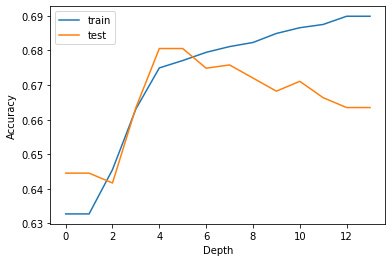

In [59]:
X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2)

pred_train = []
pred_test  = []

max_depth = 15

for depth in range(1,max_depth):
    clf = tree.DecisionTreeClassifier(splitter='best',max_depth=depth)
    clf.fit(X_train,y_train)
    pred_train += [accuracy_score(clf.predict(X_train),y_train)]
    pred_test  += [accuracy_score(clf.predict(X_test),y_test)]
    
plt.plot(pred_train, label='train')
plt.plot(pred_test, label='test')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

Construct the confusion matrix on a particular good configuration (after explaining your choice)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2)

depth = 4

clf = tree.DecisionTreeClassifier(splitter='best',max_depth=depth)
clf.fit(X_train,y_train)
    
confusion_matrix(y_test,clf.predict(X_test))

array([[390, 176],
       [167, 322]])

Provide an evaluation of the fairness of the model based on the False Positive Rate

In [76]:
afAme_x = []
afAme_y = []

cauc_x  = []
cauc_y  = []

for i,X in enumerate(train_examples):
    if X[0]:
        afAme_x += [X]
        afAme_y += [train_labels[i]]
    else :
        cauc_x  += [X]
        cauc_y  += [train_labels[i]]
        
print("Afro Americains", len(afAme_x))
print("Caucasiens", len(cauc_x))
print("Total", len(afAme_x) + len(cauc_x), '==' ,len(X_train))

Afro Americains 2525
Caucasiens 1693
Total 4218 == 4218


In [81]:
afAme_x_train, afAme_x_test, afAme_y_train, afAme_y_test = train_test_split(afAme_x, afAme_y, test_size=0.2)
cauc_x_train, cauc_x_test, cauc_y_train, cauc_y_test = train_test_split(cauc_x, cauc_y, test_size=0.2)
tot_x_train, tot_x_test, tot_y_train, tot_y_test = train_test_split(train_examples, train_labels, test_size=0.2)

In [89]:
clfAf = tree.DecisionTreeClassifier(splitter='best',max_depth=depth)
clfCa = tree.DecisionTreeClassifier(splitter='best',max_depth=depth)
clfTo = tree.DecisionTreeClassifier(splitter='best',max_depth=depth)

clfAf.fit(afAme_x_train,afAme_y_train)
clfCa.fit(cauc_x_train,cauc_y_train)
clfTo.fit(tot_x_train,tot_y_train)

afAme_matrix   = confusion_matrix(afAme_y_test,clfTo.predict(afAme_x_test))
cauc_matrix = confusion_matrix(cauc_y_test,clfAf.predict(cauc_x_test))
tot_matrix  = confusion_matrix(tot_y_test,clfCa.predict(tot_x_test))

m1 = tot_matrix-afAme_matrix
m2 = tot_matrix-cauc_matrix

print(afAme_matrix /len(afAme_x) * 100)
print(cauc_matrix /len(cauc_x) * 100)
# print(afAme_matrix - cauc_matrix)

[[6.2970297  2.57425743]
 [5.02970297 6.0990099 ]]
[[9.50974601 3.30773774]
 [2.95333727 4.25280567]]


Pour savoir si l'algorithme est équitable ou non vis à vis d'une éthnie on pourrait :
- Faire marcher l'algorithme avec les ethnies en parametre
- Le faire marcher sans mentionner les ethnies
- Faire la différence entre les matrices de confusions des 2 mesures
Si il y'a une grandes différences entre les résultats alors ont peut estimer que l'algorithme n'est pas équitable